Customer Segmentation on factors like Recency, Frequency and Monetory basis using K-Means

In [ ]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('OnlineRetail.csv')

#### Data Exploration

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#Removing duplicate rows
df = df.drop_duplicates()

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [9]:
df[df.Quantity < 1].shape

(10587, 8)

In [10]:
df[df.UnitPrice <= 0].shape

(2512, 8)

Data cleaning

In [11]:
#Removing null and fields not useful for our analysis values
df = df[df['CustomerID'].notna()]
df = df[(df['UnitPrice'] > 0)]


In [12]:
# Changing datatypes to appropriate types
df['CustomerID'] = df['CustomerID'].astype(int)
#df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.date())

In [13]:
#A new field Total costy is created
df['TotalCost'] = df['Quantity']*df['UnitPrice']

 Orders with InvoiceNo starting with C are cancelled orders. These are extracted to a new DataFrame to perform analysis

In [14]:
cancelleddf = df[df['InvoiceNo'].str.contains('C')]

In [15]:
cancelleddf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
141,C536379,D,Discount,-1,2010-12-01,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom,-6.96


In [16]:
# Removing fields not useful for our analysis
df = df[(df['Quantity'] > 0) | ((df['InvoiceNo'].str.contains('C')) & (df['Quantity'] < 0))]

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


Creating a new dataframe grouped by Country ,Customer, invoice number and totalling the sum of the invoice

In [18]:

df2 = df.groupby(['Country','CustomerID', 'InvoiceNo','InvoiceDate' ])['TotalCost'].sum().reset_index()
df2.head()


,Country,CustomerID,InvoiceNo,InvoiceDate,TotalCost
0,Australia,12386,537676,2010-12-08,258.90
1,Australia,12386,540280,2011-01-06,143.00
2,Australia,12388,541271,2011-01-17,431.30
3,Australia,12388,543357,2011-02-07,124.05
4,Australia,12388,546135,2011-03-09,210.90


Creating a new column called Recency to understand the relative number of days the the order was made compared to the last order in the data

In [19]:

maxdate = df2['InvoiceDate'].max()
df2['Recency'] = df2['InvoiceDate'].apply(lambda BillDate: maxdate - BillDate) 

In [20]:
df2.head()

,Country,CustomerID,InvoiceNo,InvoiceDate,TotalCost,Recency
0,Australia,12386,537676,2010-12-08,258.90,366 days
1,Australia,12386,540280,2011-01-06,143.00,337 days
2,Australia,12388,541271,2011-01-17,431.30,326 days
3,Australia,12388,543357,2011-02-07,124.05,305 days
4,Australia,12388,546135,2011-03-09,210.90,275 days


In [21]:
#Number of orders by country excluding cancelled orders
df2[~df2['InvoiceNo'].str.contains('C')]['Country'].value_counts()

United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Malta                       5
Israel                      5
Greece                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Lebanon   

Text(0.5, 1.0, 'Number of orders by country')

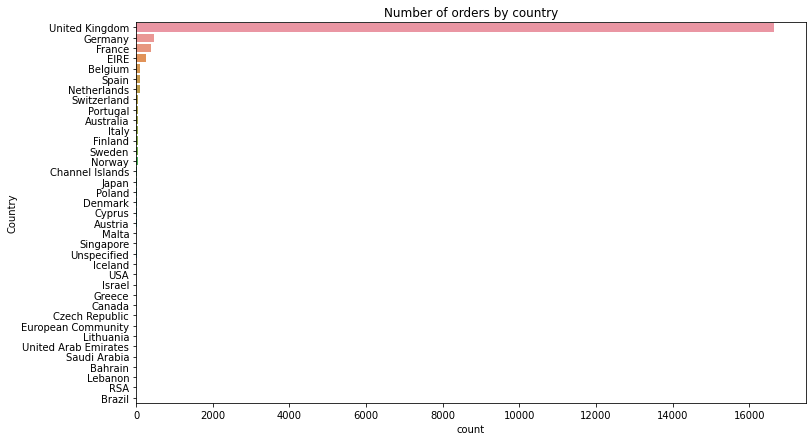

In [22]:
#Plotting Number of orders by country excluding cancelled orders
plt.figure(figsize=(12,7))
sns.countplot(y = df2[~df2['InvoiceNo'].str.contains('C')]['Country'], order = df2['Country'].value_counts().index, orient ='h')
plt.title('Number of orders by country')

Above plot shows the number of orders by country. But since there is a major disparoty between the number of orders in the top countries like UK, Germany, France, Ireland and the rest of the countries, it is almost impossible to view the bars on the graph. To avoid this, the bar graph can be displayed in log scale which gives us a better clarity

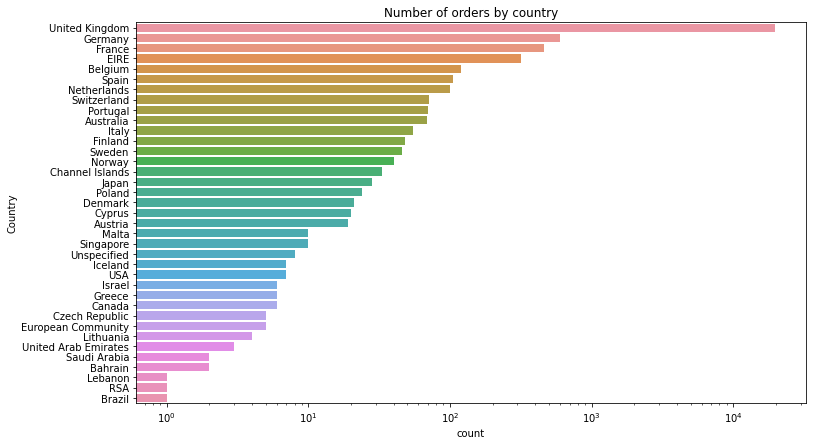

In [23]:
plt.figure(figsize=(12,7))
plt.title('Number of orders by country')
c = sns.countplot(y = df2['Country'], order = df2['Country'].value_counts().index, orient ='h')
c.set_xscale("log")

In [24]:
#Number of Customers per country
df3 = df2.groupby(['Country'])[['CustomerID']].nunique().reset_index().sort_values('CustomerID', ascending = False)
df3

,Country,CustomerID
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


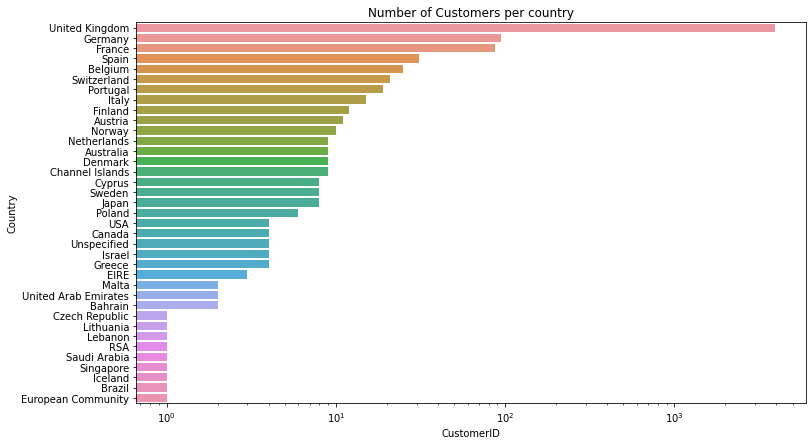

In [25]:
#Number of Customers per country
plt.figure(figsize=(12,7))
plt.title('Number of Customers per country')
c = sns.barplot(y = df3['Country'], x = df3.CustomerID,  orient ='h')
c.set_xscale("log")

In [26]:
#Total order amount per country - This would be after substracting all the amounts returned for cancelled orders
df3 = df2.groupby(['Country'])[['TotalCost']].sum().reset_index().sort_values('TotalCost', ascending = False)
df3

,Country,TotalCost
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030
3,Belgium,40910.960
31,Sweden,36585.410


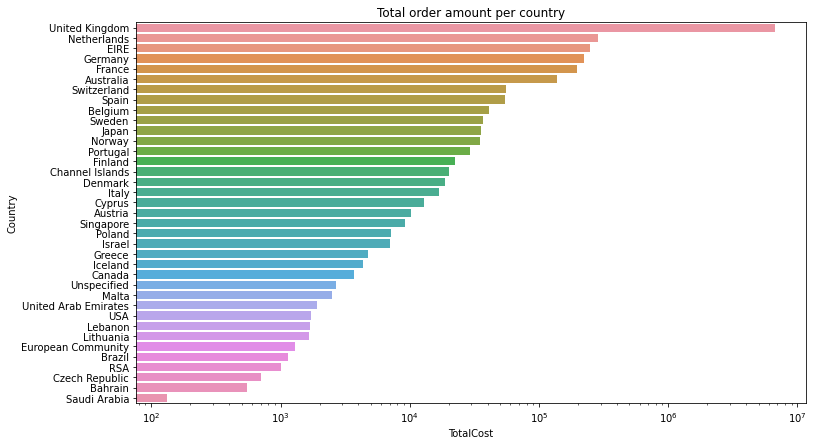

In [27]:
#Total order amount per country
plt.figure(figsize=(12,7))
plt.title('Total order amount per country')
c = sns.barplot(y = df3['Country'], x = df3.TotalCost,  orient ='h')
c.set_xscale("log")

A new Dataframe is created based on CustomerID with their Recency(how long ago the last order was placed), Frequency (how many orders were placed, including cancellations) and total cost (substracting the canclled order cost)

In [28]:

df3 = df2.groupby(['CustomerID'], as_index=False).agg(Recency=('Recency', 'min'), Frequency=('InvoiceNo', 'nunique'), TotalCost=('TotalCost', np.sum))
df3


,CustomerID,Recency,Frequency,TotalCost
0,12346,325 days,2,0.00
1,12347,2 days,7,4310.00
2,12348,75 days,4,1797.24
3,12349,18 days,1,1757.55
4,12350,310 days,1,334.40
...,...,...,...,...
4366,18280,277 days,1,180.60
4367,18281,180 days,1,80.82
4368,18282,7 days,3,176.60
4369,18283,3 days,16,2045.53


In [29]:
df3['Recency'] = df3['Recency'].dt.days
df4 = df3[['Recency',	'Frequency',	'TotalCost']]
df4 =df4[df4['TotalCost']>=0]
df4

,Recency,Frequency,TotalCost
0,325,2,0.00
1,2,7,4310.00
2,75,4,1797.24
3,18,1,1757.55
4,310,1,334.40
...,...,...,...
4366,277,1,180.60
4367,180,1,80.82
4368,7,3,176.60
4369,3,16,2045.53


 A boxplot was drawn to understand the presence of any outliers

<AxesSubplot:>

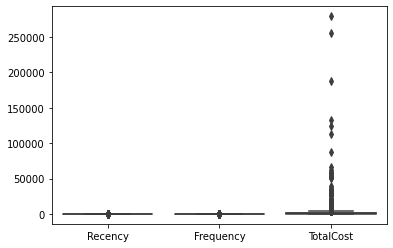

In [30]:
sns.boxplot(data = df4)

To remove the outliers, IQR method has been used. IQR of each field has been calulated 1.5 times IQR outside Q1 and Q3 has been calculated as the IQR boundaries

In [31]:

Q1 = df4['TotalCost'].quantile(0.25)
Q3 = df4['TotalCost'].quantile(0.75)
IQR = Q3 - Q1
df4 = df4[(df4['TotalCost']>= Q1 - 1.5*IQR) & (df4['TotalCost']<= Q3 + 1.5*IQR)]

Q1 = df4['Recency'].quantile(0.25)
Q3 = df4['Recency'].quantile(0.75)
IQR = Q3 - Q1
df4 = df4[(df4['Recency']>= Q1 - 1.5*IQR) & (df4['Recency']<= Q3 + 1.5*IQR)]

Q1 = df4['Frequency'].quantile(0.25)
Q3 = df4['Frequency'].quantile(0.75)
IQR = Q3 - Q1
df4 = df4[(df4['Frequency']>= Q1 - 1.5*IQR) & (df4['Frequency']<= Q3 + 1.5*IQR)]

In [32]:
df4.shape

(3692, 3)

In [33]:
# Standard scaler has been used to standardise the data before proceeding to unsupervised learning algorthms
scaler = StandardScaler()
df_final = scaler.fit_transform(df4)

In [34]:
df_final = pd.DataFrame(df_final)
df_final.columns = [ 'Frequency' , 'Recency', 'TotalCost']
df_final.head()

,Frequency,Recency,TotalCost
0,2.514088,-0.469969,-1.085032
1,-0.187373,0.361428,1.271245
2,-0.803306,-0.885668,1.219209
3,2.352001,-0.885668,-0.646616
4,-0.608800,3.271319,0.941082


In [35]:
# Now we find and plot the Sum of square error to find an optimal value of k
sse = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(df_final)
    sse.append(kmeans.inertia_)

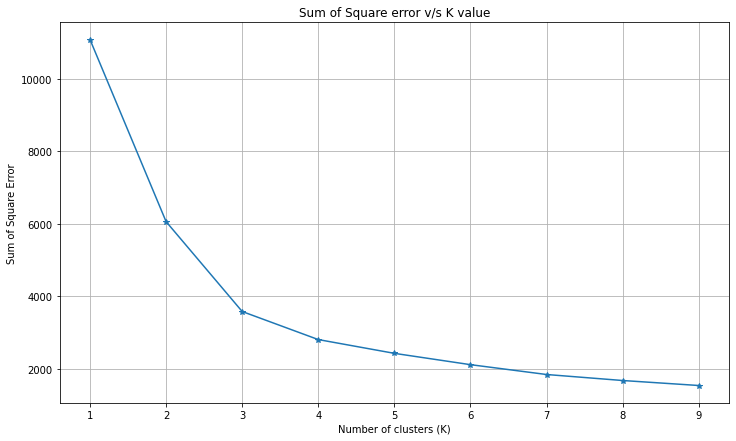

In [36]:
#When we plot the below graph of SSE vs K values, we can observe the elbow being formed at k=3. Therefore, we will be proceeding with
#3 clusters when we use the K means algorithm
x = np.arange(1,10)
plt.figure(figsize=(12,7))
plt.plot(x,sse, marker = '*')
plt.title('Sum of Square error v/s K value')
plt.ylabel('Sum of Square Error')
plt.xlabel('Number of clusters (K)')
plt.xticks(x)
plt.grid()
plt.show()

In [37]:
#Initialise the K means algorithm with 3 clusters and map the predicted cliusters back to the dataframe for convinence 
km = KMeans(n_clusters=3, init = 'k-means++')
y_pred = km.fit_predict(df_final)
df4['Cluster']= y_pred


Below are the visualisations of clustering predicted by the K Means algorithm. Each visualisation shows a scatterplot with 2 features at a time

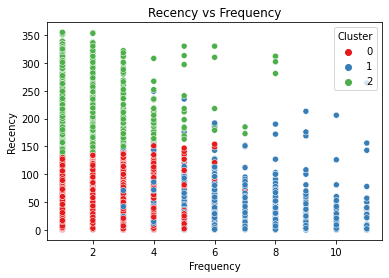

In [38]:
sns.scatterplot(x = 'Frequency', y = 'Recency', data =df4, hue = df4.Cluster, palette = 'Set1')
plt.title('Recency vs Frequency')
plt.show()

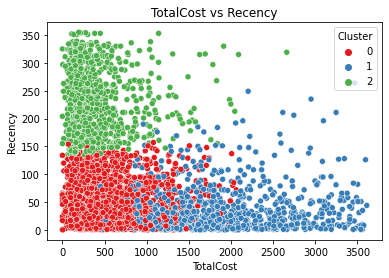

In [39]:
sns.scatterplot(x = 'TotalCost', y= 'Recency', data = df4, hue = 'Cluster', palette = 'Set1')
plt.title('TotalCost vs Recency')
plt.show()

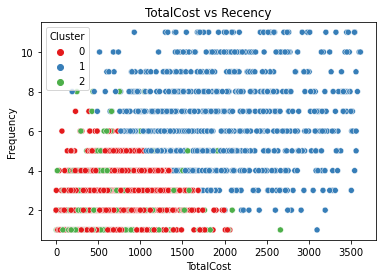

In [40]:
sns.scatterplot(x = 'TotalCost', y = 'Frequency', data = df4, hue = 'Cluster', palette = 'Set1')
plt.title('TotalCost vs Recency')
plt.show()